In [17]:
%matplotlib notebook

import matplotlib as mpl
#import DataSetQuery
import datetime
import pandas as pd
#import MalardHelpers
import geopandas as gp
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import Polygon, Point
from osgeo import gdal
import os
import numpy as np
from scipy.interpolate import griddata
import pandas as  pd
import geopandas as gp
from osgeo import gdal
import os
import json
import math
from pandas.io.json import json_normalize
import statsmodels.api as sm
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display

In [47]:
#dfStats = gp.read_file("regression_results/ols_run_tdx2.gpkg")
dfStats = gp.read_file("regression_results/iceland.gpkg")
rivers = gp.read_file("/data/puma1/scratch/mtngla/background-shapefiles/rivers_reprojected.shp")
countries = gp.read_file("/data/puma1/scratch/mtngla/background-shapefiles/countries.shp")
#coastline = gp.read_file('/data/puma1/scratch/mtngla/background-shapefiles/alaska/coastline.shp')


In [48]:
pd.options.display.max_columns = None
display(dfStats)


,maxX,maxY,minX,minY,geometry
0,"516,449.681000","27,419.151000","516,359.681000","27,329.151000",POINT (516404.6810000001 27374.15099999995)
1,"516,539.681000","27,419.151000","516,449.681000","27,329.151000",POINT (516494.6810000001 27374.15099999995)
2,"516,629.681000","27,419.151000","516,539.681000","27,329.151000",POINT (516584.6810000001 27374.15099999995)
3,"516,719.681000","27,419.151000","516,629.681000","27,329.151000",POINT (516674.6810000001 27374.15099999995)
4,"516,809.681000","27,419.151000","516,719.681000","27,329.151000",POINT (516764.6810000001 27374.15099999995)
5,"516,899.681000","27,419.151000","516,809.681000","27,329.151000",POINT (516854.6810000001 27374.15099999995)
6,"516,989.681000","27,419.151000","516,899.681000","27,329.151000",POINT (516944.6810000001 27374.15099999995)
7,"517,079.681000","27,419.151000","516,989.681000","27,329.151000",POINT (517034.6810000001 27374.15099999995)
8,"517,169.681000","27,419.151000","517,079.681000","27,329.151000",POINT (517124.6810000001 27374.15099999995)
9,"517,259.681000","27,419.151000","517,169.681000","27,329.151000",POINT (517214.6810000001 27374.15099999995)


In [41]:
dfStats.columns

Index(['maxX', 'maxY', 'minX', 'minY', 'regression.rsquared', 'regression.c',
       'regression.c.se', 'regression.c.year', 'regression.c.se.year',
       'regression.const', 'regression.const.se', 'regression.count',
       'regression.robust.c', 'regression.robust.c.se',
       'regression.robust.c.year', 'regression.robust.c.se.year',
       'regression.robust.const', 'regression.robust.const.se',
       'regression.robust.count', 'regression.w_power.rsquared',
       'regression.w_power.c', 'regression.w_power.c.se',
       'regression.w_power.c.year', 'regression.w_power.c.se.year',
       'regression.w_power.const', 'regression.w_power.const.se',
       'regression.w_power.count', 'regression.w_power.count_masked',
       'regression.w_coh.rsquared', 'regression.w_coh.c',
       'regression.w_coh.c.se', 'regression.w_coh.c.year',
       'regression.w_coh.c.se.year', 'regression.w_coh.const',
       'regression.w_coh.const.se', 'regression.w_coh.count',
       'regression.w_coh.c

In [26]:
dfStats['regression.w_power.count_masked'].max()

0.0

In [27]:
dfStats.shape[0]

99

In [43]:
pd.options.display.float_format = '{:20,.6f}'.format
dfStats.mean()

maxX                                    516,899.681000
maxY                                     27,059.151000
minX                                    516,809.681000
minY                                     26,969.151000
regression.rsquared                           0.840282
regression.c                                 -0.000000
regression.c.se                               0.000000
regression.c.year                            -2.723289
regression.c.se.year                          0.232120
regression.const                            109.797813
regression.const.se                          10.587468
regression.count                             25.555556
regression.robust.c                          -0.000000
regression.robust.c.se                        0.000000
regression.robust.c.year                     -2.753063
regression.robust.c.se.year                   0.235731
regression.robust.const                     111.169466
regression.robust.const.se                   10.747596
regression

In [14]:

dfStats.loc[(dfStats['statistics.GlacierMaskArea']<10.0), 'statistics.GlacierMaskArea.pointsize'] = 5
dfStats.loc[(dfStats['statistics.GlacierMaskArea']>=10.0) & (dfStats['statistics.GlacierMaskArea']<100.0), 'statistics.GlacierMaskArea.pointsize'] = 20
dfStats.loc[(dfStats['statistics.GlacierMaskArea']>=100.0) & (dfStats['statistics.GlacierMaskArea']<500.0), 'statistics.GlacierMaskArea.pointsize'] = 50
dfStats.loc[(dfStats['statistics.GlacierMaskArea']>=500.0) & (dfStats['statistics.GlacierMaskArea']<1000.0), 'statistics.GlacierMaskArea.pointsize'] = 80
dfStats.loc[(dfStats['statistics.GlacierMaskArea']>=1000.0) & (dfStats['statistics.GlacierMaskArea']<2000.0), 'statistics.GlacierMaskArea.pointsize'] = 125
dfStats.loc[(dfStats['statistics.GlacierMaskArea']>2000.0), 'statistics.GlacierMaskArea.pointsize'] = 170

KeyError: 'statistics.GlacierMaskArea'

<IPython.core.display.Javascript object>


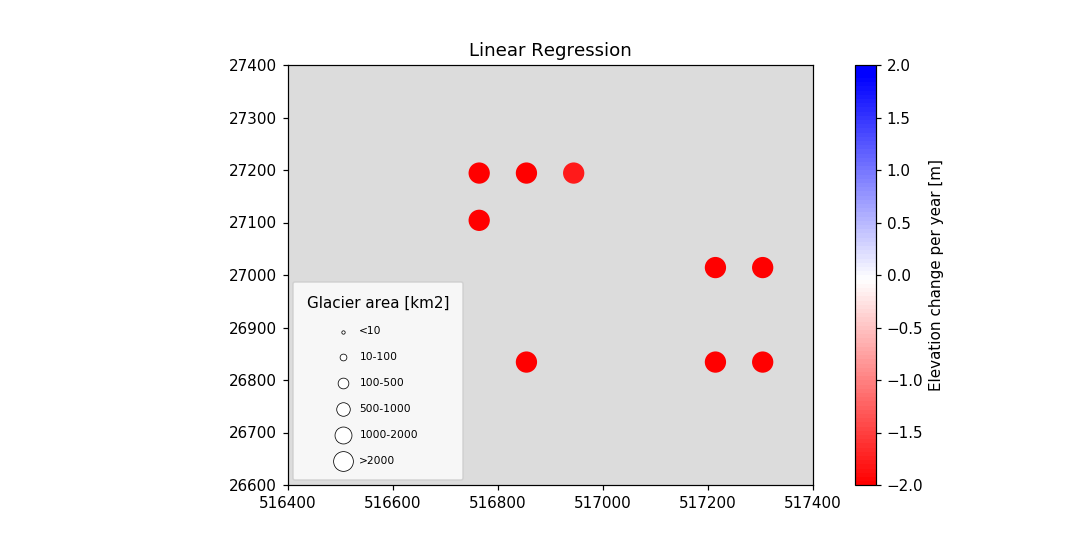

Text(0.5, 1.0, 'Linear Regression')

In [46]:
%matplotlib notebook


colors = [(1, 0, 0), (1, 1, 1), (0, 0, 1)]  # R -> W -> B
n_bin = 98  # Discretizes the interpolation into bins
# Create the colormap
cm_ = LinearSegmentedColormap.from_list('my_list', colors, N=n_bin)
cm = LinearSegmentedColormap.from_list('extremes',list(map(cm_,range(100))), N=100)

#dfStatsfiltered = dfStats[(dfStats['regression.c.se.year'] <= 0.20)]
dfStatsfiltered = dfStats[(dfStats['regression.count']).notnull()]
vmin=-2
vmax=2
fig, ax = plt.subplots(figsize=(10,5))

# plot rivers and country boundaries
countries.plot(ax=ax, edgecolor='grey', color='gainsboro', linewidth=0.5)
rivers.plot(ax=ax, edgecolor='blue', linewidth=0.2)
#coastline.plot(ax=ax, color='blue', edgecolor=None, linewidth=0.2)

#markersize = dfStats['regression.count']/100
#msf = 170
#markersize = (dfStatsfiltered['statistics.GlacierMaskArea'])*msf
#markersize = dfStatsfiltered['statistics.GlacierMaskArea.pointsize']
markersize=170
dfStatsfiltered.plot(ax=ax, column='regression.c.year', markersize=markersize, vmin=vmin, \
                     vmax=vmax, cmap=cm)

#labels = ["0.05", "0.10", "0.20", "0.30"]
#sizes = [(1-0.05)*msf, (1-0.10)*msf, (1-0.20)*msf, (1-0.30)*msf]
#print(sizes)
labels = ["<10", "10-100", "100-500", "500-1000", "1000-2000", ">2000"]
sizes = [5, 20, 50, 80, 125, 170]
markers=[]
for size in sizes:
    markers.append(plt.scatter([],[], s=size, label=size, color='white', edgecolor='black', linewidth=0.5))

bar=fig.colorbar(mappable=mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax), cmap=cm))
bar.set_label('Elevation change per year [m]')
    
plt.legend(handles=markers)
leg = plt.legend(markers, labels, ncol=1, frameon=True, fontsize=7,handlelength=1, loc = 3, borderpad = 1.3,\
handletextpad=1, title='Glacier area [km2]', scatterpoints = 1, labelspacing=1.5)

plt.xlim(516400, 517400)
plt.ylim(26600, 27400)
plt.title('Linear Regression')

In [45]:
dfStatsfiltered[['regression.c.year','regression.c.se.year', 'regression.robust.c.year','regression.robust.c.se.year', 'regression.w_power.c.year','regression.w_power.c.se.year', 'regression.w_coh.c.year','regression.w_coh.c.se.year']]

,regression.c.year,regression.c.se.year,regression.robust.c.year,regression.robust.c.se.year,regression.w_power.c.year,regression.w_power.c.se.year,regression.w_coh.c.year,regression.w_coh.c.se.year
26,-1.983391,0.166995,-2.037350,0.165761,-1.891240,0.186134,-2.001323,0.162752
27,-2.762200,0.273632,-2.789438,0.315281,-2.514294,0.295979,-2.727612,0.253244
28,-1.763361,0.154109,-1.717617,0.150315,-1.624657,0.146215,-1.725103,0.162882
37,-2.180001,0.344198,-2.180001,0.344198,-2.209769,0.369398,-2.199311,0.332633
53,-3.440967,0.187889,-3.474960,0.157236,-3.559800,0.153843,-3.450654,0.191645
54,-3.688941,0.115875,-3.694943,0.119671,-3.675882,0.077967,-3.709777,0.114882
71,-2.699193,0.207789,-2.705436,0.249281,-2.694021,0.254951,-2.678980,0.186991
75,-2.824331,0.261276,-2.829253,0.266148,-3.179543,0.261346,-2.872537,0.262572
76,-3.167219,0.377321,-3.348571,0.353685,-3.270843,0.417685,-3.067418,0.383068


In [26]:
dfStatsfiltered.shape[0]

97

<IPython.core.display.Javascript object>


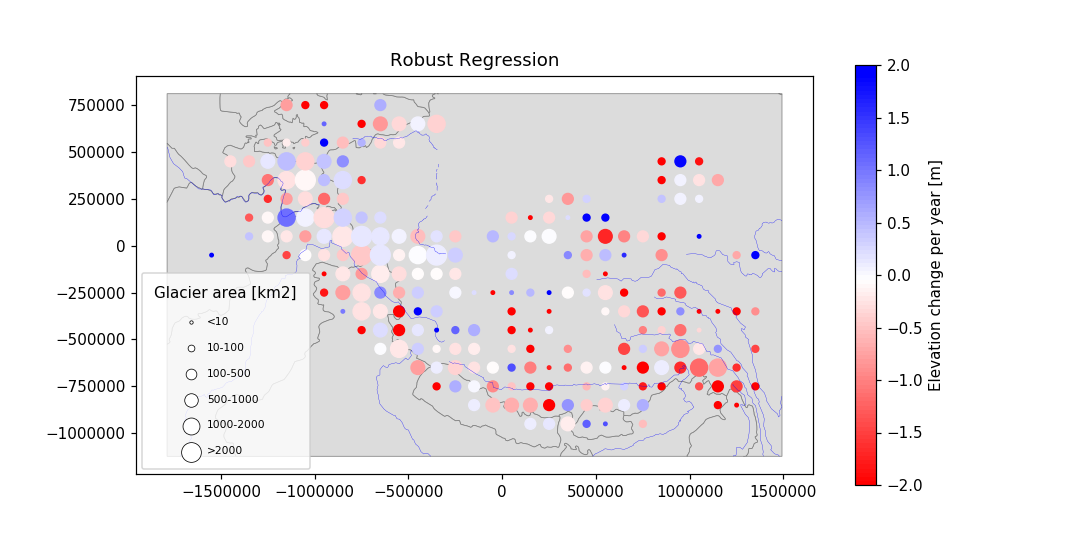

Text(0.5, 1.0, 'Robust Regression')

In [13]:
#ROBUST
%matplotlib notebook


colors = [(1, 0, 0), (1, 1, 1), (0, 0, 1)]  # R -> W -> B
n_bin = 98  # Discretizes the interpolation into bins
# Create the colormap
cm_ = LinearSegmentedColormap.from_list('my_list', colors, N=n_bin)
cm = LinearSegmentedColormap.from_list('extremes',list(map(cm_,range(100))), N=100)

#dfStatsfiltered = dfStats[(dfStats['regression.c.se.year'] <= 0.20)]
dfStatsfiltered = dfStats[(dfStats['regression.robust.count'] > 50)]
vmin=-2
vmax=2
fig, ax = plt.subplots(figsize=(10,5))

# plot rivers and country boundaries
countries.plot(ax=ax, edgecolor='grey', color='gainsboro', linewidth=0.5)
rivers.plot(ax=ax, edgecolor='blue', linewidth=0.2)
#coastline.plot(ax=ax, color='blue', edgecolor=None, linewidth=0.2)


markersize = dfStatsfiltered['statistics.GlacierMaskArea.pointsize']
dfStatsfiltered.plot(ax=ax, column='regression.robust.c.year', markersize=markersize, vmin=vmin, \
                     vmax=vmax, cmap=cm)

bar=fig.colorbar(mappable=mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax), cmap=cm))
bar.set_label('Elevation change per year [m]')

labels = ["<10", "10-100", "100-500", "500-1000", "1000-2000", ">2000"]
sizes = [5, 20, 50, 80, 125, 170]
markers=[]
for size in sizes:
    markers.append(plt.scatter([],[], s=size, label=size, color='white', edgecolor='black', linewidth=0.5))

plt.legend(handles=markers)
leg = plt.legend(markers, labels, ncol=1, frameon=True, fontsize=7,handlelength=1, loc = 6, borderpad = 1.2,\
handletextpad=1, title='Glacier area [km2]', scatterpoints = 1, labelspacing=1.5)

#plt.xlim(-5100000, -2200000)
#plt.ylim(-900000, 1900000)
plt.title('Robust Regression')

<IPython.core.display.Javascript object>


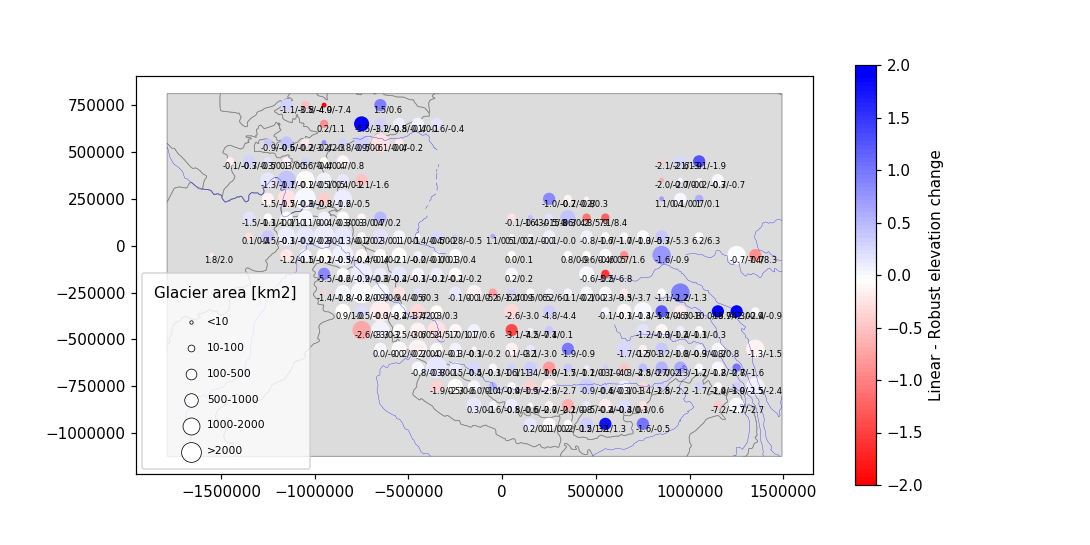

In [15]:
%matplotlib notebook
# DIFFERENCE between linear and robust

dfStats['regression.c.difference'] = abs(dfStats['regression.c.year'])-abs(dfStats['regression.robust.c.year'])
fig, ax = plt.subplots(figsize=(10,5))

# plot rivers and country boundaries
countries.plot(ax=ax, edgecolor='grey', color='gainsboro', linewidth=0.5)
rivers.plot(ax=ax, edgecolor='blue', linewidth=0.2)
#coastline.plot(ax=ax, color='blue', edgecolor=None, linewidth=0.2)

vmin=-2
vmax=2

markersize = dfStatsfiltered['statistics.GlacierMaskArea.pointsize']
dfStats.plot(ax=ax, column='regression.c.difference', markersize=markersize, vmin=vmin, \
                     vmax=vmax, cmap=cm)

bar=fig.colorbar(mappable=mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax), cmap=cm))
bar.set_label('Linear - Robust elevation change')

labels = ["<10", "10-100", "100-500", "500-1000", "1000-2000", ">2000"]
sizes = [5, 20, 50, 80, 125, 170]
markers=[]
for size in sizes:
    markers.append(plt.scatter([],[], s=size, label=size, color='white', edgecolor='black', linewidth=0.5))

plt.legend(handles=markers)
leg = plt.legend(markers, labels, ncol=1, frameon=True, fontsize=7,handlelength=1, loc = 3, borderpad = 1.2,\
handletextpad=1, title='Glacier area [km2]', scatterpoints = 1, labelspacing=1.5)

#plt.xlim(-5100000, -2200000)
#plt.ylim(-900000, 1900000)

for i, txt in enumerate(dfStatsfiltered['regression.c.year']):
    en = "%.1f/%.1f" %(dfStatsfiltered.loc[dfStatsfiltered.index[i], 'regression.c.year'], dfStatsfiltered.loc[dfStatsfiltered.index[i], 'regression.robust.c.year'])
    ax.annotate(en, (dfStatsfiltered.loc[dfStatsfiltered.index[i], 'gridCell.minX']+ \
                               (size/2)+10000, dfStatsfiltered.loc[dfStatsfiltered.index[i], 'gridCell.minY']+\
                               (size/2)+10000), fontsize=5.5)

<IPython.core.display.Javascript object>


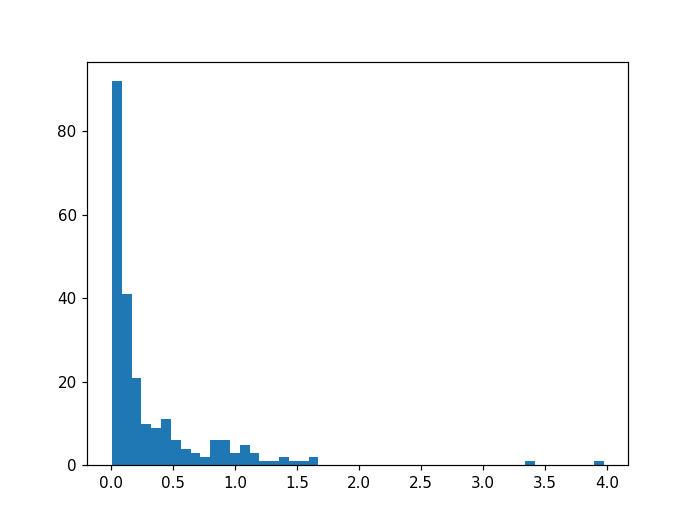

/home/earthwave/miniconda3/envs/dev/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/earthwave/miniconda3/envs/dev/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([92., 41., 21., 10.,  9., 11.,  6.,  4.,  3.,  2.,  6.,  6.,  3.,
         5.,  3.,  1.,  1.,  2.,  1.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.00809875, 0.08739327, 0.16668778, 0.2459823 , 0.32527681,
        0.40457133, 0.48386584, 0.56316036, 0.64245487, 0.72174939,
        0.8010439 , 0.88033842, 0.95963293, 1.03892745, 1.11822196,
        1.19751648, 1.27681099, 1.35610551, 1.43540002, 1.51469454,
        1.59398905, 1.67328357, 1.75257808, 1.8318726 , 1.91116711,
        1.99046163, 2.06975614, 2.14905066, 2.22834517, 2.30763969,
        2.3869342 , 2.46622872, 2.54552323, 2.62481775, 2.70411226,
        2.78340678, 2.86270129, 2.94199581, 3.02129032, 3.10058484,
        3.17987936, 3.25917387, 3.33846839, 3.4177629 , 3.49705742,
        3.57635193, 3.65564645, 3.73494096, 3.81423548, 3.89352999,
        3.97282451]),
 <a list of 50

In [16]:
%matplotlib notebook
plt.hist(dfStats['regression.c.se.year'], bins=50)

<IPython.core.display.Javascript object>


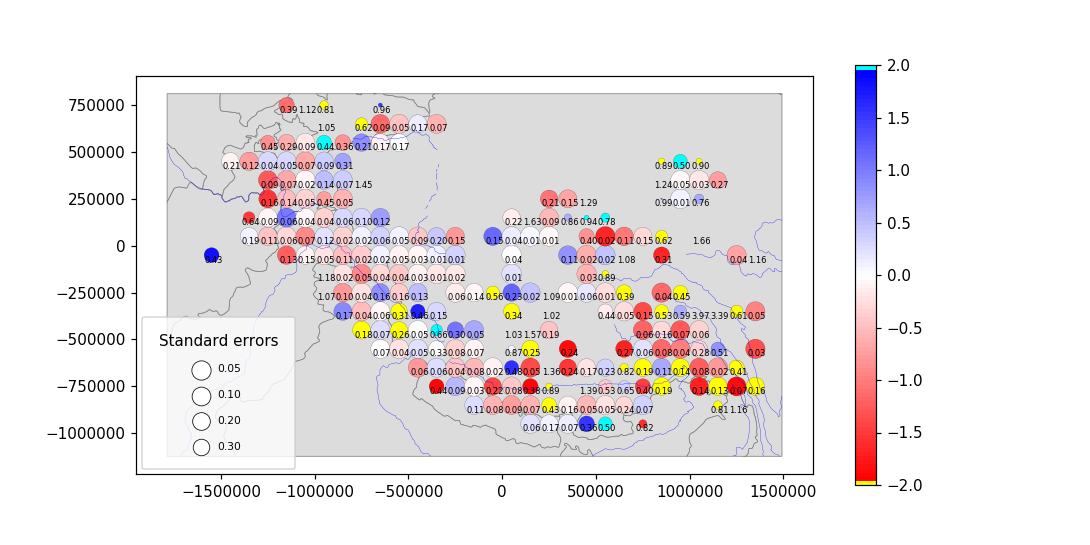

In [19]:
%matplotlib notebook


colors = [(1, 0, 0), (1, 1, 1), (0, 0, 1)]  # R -> W -> B
n_bin = 98  # Discretizes the interpolation into bins
# Create the colormap
cm_ = LinearSegmentedColormap.from_list('my_list', colors, N=n_bin)
cm = LinearSegmentedColormap.from_list('extremes',[(1, 1, 0)]+list(map(cm_,range(98)))+[(0, 1, 1)], N=100)

#dfStatsfiltered = dfStats[(dfStats['regression.c.se.year'] <= 0.20)]
dfStatsfiltered = dfStats[(dfStats['regression.count'] > 50)]
vmin=-2
vmax=2
fig, ax = plt.subplots(figsize=(10,5))

# plot rivers and country boundaries
countries.plot(ax=ax, edgecolor='grey', color='gainsboro', linewidth=0.5)
rivers.plot(ax=ax, edgecolor='blue', linewidth=0.2)
#coastline.plot(ax=ax, color='blue', edgecolor=None, linewidth=0.2)

#markersize = dfStats['regression.count']/100
msf = 170
markersize = (1-dfStatsfiltered['regression.c.se.year'])*msf
dfStatsfiltered.plot(ax=ax, column='regression.c.year', markersize=markersize, legend=True, vmin=vmin, \
                     vmax=vmax, cmap=cm, edgecolor='black', linewidth=0.1)

labels = ["0.05", "0.10", "0.20", "0.30"]
sizes = [(1-0.05)*msf, (1-0.10)*msf, (1-0.20)*msf, (1-0.30)*msf]
markers=[]
for size in sizes:
    markers.append(plt.scatter([],[], s=size, label=size, color='white', edgecolor='black', linewidth=0.5))

plt.legend(handles=markers)
leg = plt.legend(markers, labels, ncol=1, frameon=True, fontsize=7,handlelength=1, loc = 3, borderpad = 1.6,\
handletextpad=1, title='Standard errors', scatterpoints = 1, labelspacing=1.5)

#plt.xlim(-5100000, -2200000)
#plt.ylim(-900000, 1900000)

for i, txt in enumerate(dfStatsfiltered['regression.c.se.year']):
    en = "%.2f" %(dfStatsfiltered.loc[dfStatsfiltered.index[i], 'regression.c.se.year'])
    ax.annotate(en, (dfStatsfiltered.loc[dfStatsfiltered.index[i], 'gridCell.minX']+ \
                               (size/2)+10000, dfStatsfiltered.loc[dfStatsfiltered.index[i], 'gridCell.minY']+\
                               (size/2)+10000), fontsize=5.5)

<IPython.core.display.Javascript object>


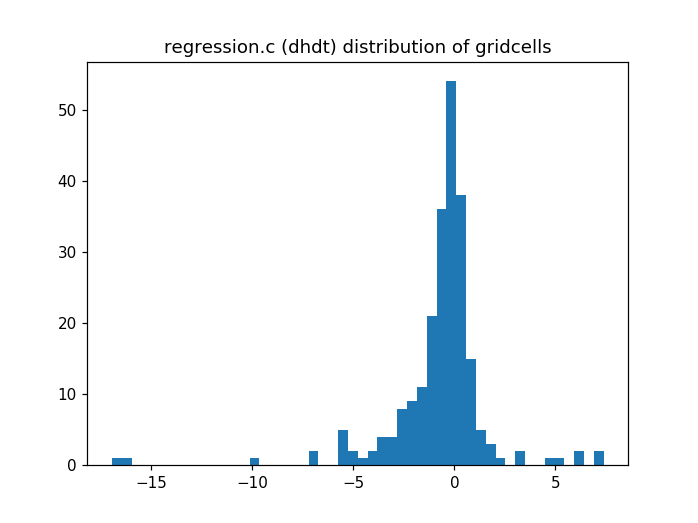

In [20]:
%matplotlib notebook
plt.hist(dfStatsfiltered['regression.c.year'], bins=50)
plt.title('regression.c (dhdt) distribution of gridcells')
plt.show()

<IPython.core.display.Javascript object>


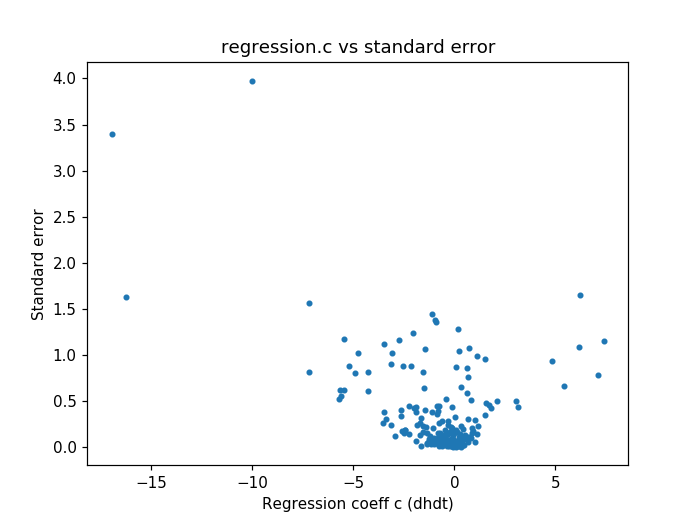

In [21]:
%matplotlib notebook
plt.scatter(dfStatsfiltered['regression.c.year'],dfStatsfiltered['regression.c.se.year'], marker='.')
plt.title('regression.c vs standard error')
plt.xlabel('Regression coeff c (dhdt)')
plt.ylabel('Standard error')
plt.show()

<IPython.core.display.Javascript object>


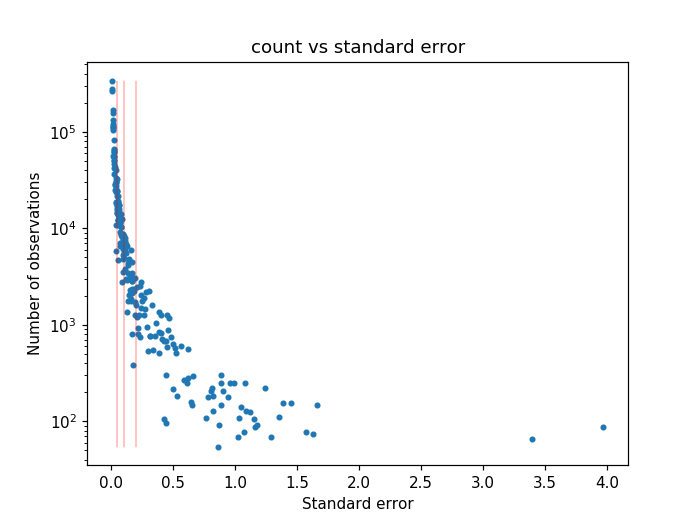

In [22]:
%matplotlib notebook
fig, ax = plt.subplots()
plt.scatter(dfStatsfiltered['regression.c.se.year'],dfStatsfiltered['regression.count'], marker='.')
ymax=dfStatsfiltered['regression.count'].max()
ymin=dfStatsfiltered['regression.count'].min()
plt.plot([0.05,0.05],[ymin,ymax], '-r', linewidth=0.3)
plt.plot([0.1,0.1],[ymin,ymax], '-r', linewidth=0.3)
plt.plot([0.2,0.2],[ymin,ymax], '-r', linewidth=0.3)
plt.title('count vs standard error')
plt.ylabel('Number of observations')
plt.xlabel('Standard error')
ax.set_yscale('log')
plt.show()

<IPython.core.display.Javascript object>


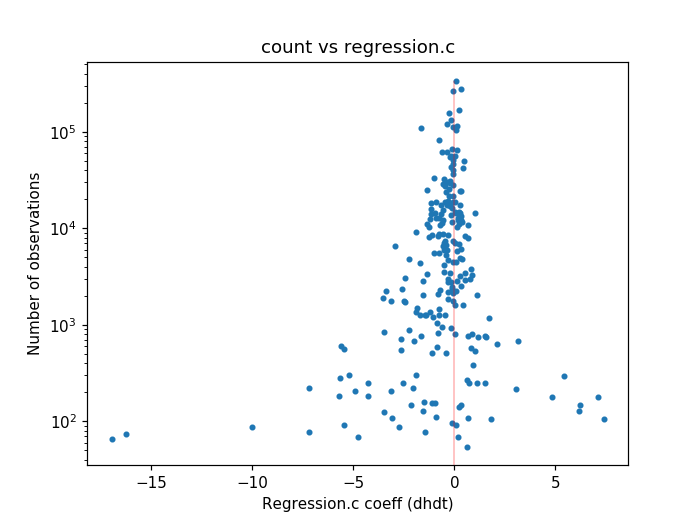

In [23]:
%matplotlib notebook
fig, ax = plt.subplots()
plt.scatter(dfStatsfiltered['regression.c.year'],dfStatsfiltered['regression.count'], marker='.')
ymax=dfStatsfiltered['regression.count'].max()
plt.plot([0,0],[0,ymax], '-r', linewidth=0.3)
plt.title('count vs regression.c')
plt.ylabel('Number of observations')
plt.xlabel('Regression.c coeff (dhdt)')
ax.set_yscale('log')
plt.show()